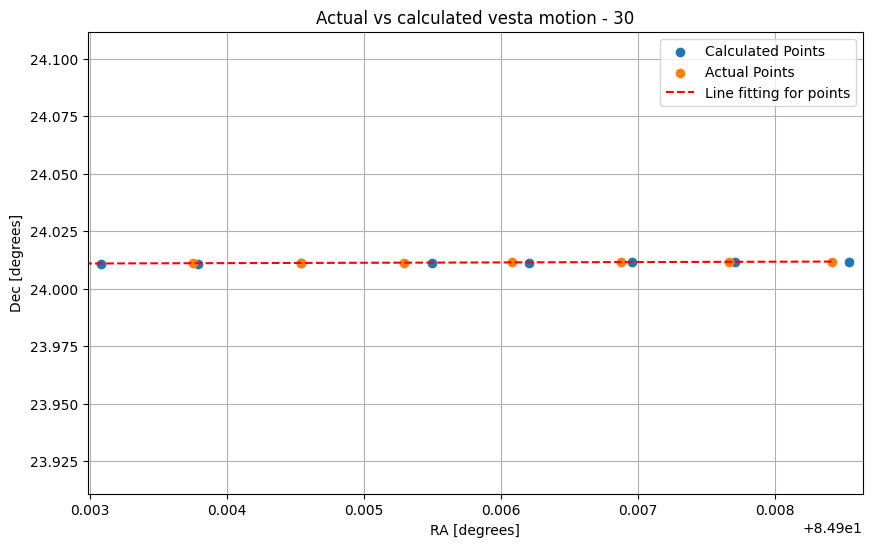

In [2]:
#30 Exposure
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import FancyArrowPatch
import numpy as np


# 0758-30
# RA: 5h 39m 36.74s
# Dec: 24° 0' 39.01''

#0803-30
# RA: 5h 39m 36.91s
# Dec: 24° 0' 39.55''

#0808-30
# RA: 5h 39m 37.09s
# Dec: 24° 0' 40.25''

#0813-10
# RA: 5h 39m 37.32s
# Dec: 24° 0' 40.82''

#0818-30
# RA: 5h 39m 37.49s
# Dec: 24° 0' 41.10''

#0823-30
# RA: 5h 39m 37.67s
# Dec: 24° 0' 41.50''

#0828-30
# RA: 5h 39m 37.85s
# Dec: 24° 0' 41.95''

#0833-30
# RA: 5h 39m 38.05s
# Dec: 24° 0' 42.55''



# Data
ra_hours = [5, 5, 5, 5, 5, 5, 5, 5]
ra_minutes = [39, 39, 39, 39, 39, 39, 39, 39]
ra_seconds = np.array([36.74, 36.91, 37.09, 37.32, 37.49, 37.67, 37.85, 38.05])
ra_secondsUpdated = []


# print(ra_secondsUpdated)

dec_degrees = [24, 24, 24, 24, 24, 24, 24, 24]
dec_arcminutes = [0, 0, 0, 0, 0, 0, 0, 0]
dec_arcseconds = [39.01, 39.55, 40.25, 40.82, 41.10, 41.50, 41.95, 42.55]

ra_hours_actual = [5, 5, 5, 5, 5, 5, 5, 5]
ra_minutes_actual = [39, 39, 39, 39, 39, 39, 39, 39]
ra_seconds_actual = np.array([36.71, 36.90, 37.09, 37.27, 37.46, 37.65, 37.84, 38.02])
# 6.87, 6.84, 6.99, 6.81,
# Define a polynomial function for curve fitting
# def poly_func(x, *coeffs):
#     return sum([coeffs[i] * x**i for i in range(len(coeffs))])

# # Fit the polynomial function to the data
# coeffs, _ = curve_fit(poly_func, ra_seconds, ra_seconds_actual, p0=(1, 1, 1, 1, 1))

# Use the fitted polynomial to predict the actual ra_seconds values
# ra_seconds_aligned = poly_func(ra_seconds, *coeffs)

# print(ra_seconds_aligned)


# for i in range(len(ra_seconds)):
#     ra_secondsUpdated.append(((ra_seconds[i]+ra_seconds_actual[i])/2)-2)

dec_degrees_actual = [24, 24, 24, 24, 24, 24, 24, 24]
dec_arcminutes_actual = [0, 0, 0, 0, 0, 0, 0, 0]
dec_arcseconds_actual = [39.6, 40.0, 40.4, 40.9, 41.3, 41.7, 42.2, 42.6]

# Convert RA to decimal degrees
ra_decimal = [(hours + minutes/60 + seconds/3600) * 15 for hours, minutes, seconds in zip(ra_hours, ra_minutes, ra_seconds)]

# Convert Dec to decimal degrees
dec_decimal = [degrees + arcminutes/60 + arcseconds/3600 for degrees, arcminutes, arcseconds in zip(dec_degrees, dec_arcminutes, dec_arcseconds)]


# Convert RA to decimal degrees
ra_decimal_actual = [(hours + minutes/60 + seconds/3600) * 15 for hours, minutes, seconds in zip(ra_hours_actual, ra_minutes_actual, ra_seconds_actual)]

# Convert Dec to decimal degrees
dec_decimal_actual = [degrees + arcminutes/60 + arcseconds/3600 for degrees, arcminutes, arcseconds in zip(dec_degrees_actual, dec_arcminutes_actual, dec_arcseconds_actual)]




# Fit two straight lines through the new points
coefficients_1 = np.polyfit(ra_decimal, dec_decimal, 1)
polynomial_1 = np.poly1d(coefficients_1)
x_1 = np.linspace(min(ra_decimal), max(ra_decimal), 100)
y_1 = polynomial_1(x_1)

coefficients_2 = np.polyfit(ra_decimal_actual, dec_decimal_actual, 1)
polynomial_2 = np.poly1d(coefficients_2)
x_2 = np.linspace(min(ra_decimal_actual), max(ra_decimal_actual), 100)
y_2 = polynomial_2(x_2)



# Plot both sets of points and the fitted lines
plt.figure(figsize=(10, 6))
plt.scatter(ra_decimal, dec_decimal, label='Calculated Points')
plt.scatter(ra_decimal_actual, dec_decimal_actual, label='Actual Points')
# plt.plot(x_1, y_1, color='green',linestyle='--', label='Line fitting for calculated points',)
plt.plot(x_2, y_2, color='red',linestyle='--', label='Line fitting for points')

plt.xlabel('RA [degrees]')
plt.ylabel('Dec [degrees]')
plt.title('Actual vs calculated vesta motion - 30')
plt.legend()
plt.grid(True)
plt.xlim(min(ra_decimal) - 0.0001, max(ra_decimal) + 0.0001)
plt.ylim(min(dec_decimal) - 0.1, max(dec_decimal) + 0.1)
plt.show()


